### Exploratory Data Analysis for a Monte Carlos Simulation

### Import all modules needed

In [23]:
import matplotlib.pyplot as plt
import numpy as np 
import yfinance as yf
import pandas as pd
import seaborn as sns

---

#### We will use data from *Microsoft, Apple and NVidea*

In [83]:
tickers = yf.Tickers('MSFT AAPL NVDA LCID QS WBD NU TSLA INTC RIOT')
all_ticker = yf.download('MSFT AAPL NVDA LCID QS WBD NU TSLA INTC RIOT', period="10y", group_by='ticker')  #download data
backup = all_ticker.copy()  # Create a backup of the data


C:\Users\csg20\AppData\Local\Temp\ipykernel_1636\1230820802.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_ticker = yf.download('MSFT AAPL NVDA LCID QS WBD NU TSLA INTC RIOT', period="10y", group_by='ticker')  #download data
[*********************100%***********************]  10 of 10 completed


### Starting EDA properly

In [85]:
all_ticker.head()  # Display the first 5 rows of the downloaded data

Ticker     LCID                             AAPL                        \
Price      Open High Low Close Volume       Open       High        Low   
Date                                                                     
2015-07-20  NaN  NaN NaN   NaN    NaN  29.332939  29.780873  29.272467   
2015-07-21  NaN  NaN NaN   NaN    NaN  29.753998  29.769674  29.187363   
2015-07-22  NaN  NaN NaN   NaN    NaN  27.321714  28.107838  27.321714   
2015-07-23  NaN  NaN NaN   NaN    NaN  28.264603  28.463933  28.009281   
2015-07-24  NaN  NaN NaN   NaN    NaN  28.067522  28.161588  27.749489   

Ticker                            ...       TSLA                        \
Price           Close     Volume  ...       Open       High        Low   
Date                              ...                                    
2015-07-20  29.579304  235600800  ...  18.333332  19.110001  18.169333   
2015-07-21  29.283667  307025600  ...  18.003332  18.233334  17.770000   
2015-07-22  28.045128  461802400  ...  17.417999  17.962667  17.390667   
2015-07-23  28.031679  203998000  ...  17.976667  17.993334  17.684668   
2015-07-24  27.883869  168649200  ...  17.825333  18.072666  17.594667   

Ticker                               NVDA                                \
Price           Close    Volume      Open      High       Low     Close   
Date                                                                      
2015-07-20  18.817333  74677500  0.485718  0.487654  0.475554  0.476764   
2015-07-21  17.784666  91630500  0.475796  0.485718  0.475796  0.478942   
2015-07-22  17.858000  46575000  0.475554  0.475554  0.463937  0.469745   
2015-07-23  17.813334  33408000  0.470713  0.482572  0.469745  0.475554   
2015-07-24  17.694000  42547500  0.478942  0.479426  0.468051  0.469987   

Ticker                 
Price          Volume  
Date                   
2015-07-20  188412000  
2015-07-21  149720000  
2015-07-22  356472000  
2015-07-23  169916000  
2015-07-24  188844000  

[5 rows x 50 columns]

In [87]:
all_ticker.info()  # Display information about the DataFrame
# There IS NaN values

all_ticker.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-07-20 to 2025-07-18
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (LCID, Open)    1213 non-null   float64
 1   (LCID, High)    1213 non-null   float64
 2   (LCID, Low)     1213 non-null   float64
 3   (LCID, Close)   1213 non-null   float64
 4   (LCID, Volume)  1213 non-null   float64
 5   (AAPL, Open)    2515 non-null   float64
 6   (AAPL, High)    2515 non-null   float64
 7   (AAPL, Low)     2515 non-null   float64
 8   (AAPL, Close)   2515 non-null   float64
 9   (AAPL, Volume)  2515 non-null   int64  
 10  (MSFT, Open)    2515 non-null   float64
 11  (MSFT, High)    2515 non-null   float64
 12  (MSFT, Low)     2515 non-null   float64
 13  (MSFT, Close)   2515 non-null   float64
 14  (MSFT, Volume)  2515 non-null   int64  
 15  (NU, Open)      904 non-null    float64
 16  (NU, High)      904 non-null    float64
 17  (NU, Low)      

Ticker  Price 
LCID    Open      1302
        High      1302
        Low       1302
        Close     1302
        Volume    1302
AAPL    Open         0
        High         0
        Low          0
        Close        0
        Volume       0
MSFT    Open         0
        High         0
        Low          0
        Close        0
        Volume       0
NU      Open      1611
        High      1611
        Low       1611
        Close     1611
        Volume    1611
QS      Open      1279
        High      1279
        Low       1279
        Close     1279
        Volume    1279
WBD     Open         0
        High         0
        Low          0
        Close        0
        Volume       0
RIOT    Open       176
        High       176
        Low        176
        Close      176
        Volume     176
INTC    Open         0
        High         0
        Low          0
        Close        0
        Volume       0
TSLA    Open         0
        High         0
        Low        

#### OHLCV - Meaning

-   Open -> First traded price
-   High -> Highest price
-   Low -> Lowest price
-   Close -> Final traded price
-   Volume -> Total number of shares and contracts on a periody

In [88]:
all_ticker.describe()  # Display summary statistics of the DataFrame
# Special Attention to STD Variation, which is the standard deviation of the returns

Ticker         LCID                                                       \
Price          Open         High          Low        Close        Volume   
count   1213.000000  1213.000000  1213.000000  1213.000000  1.213000e+03   
mean      12.558702    13.054931    12.070087    12.552479  4.248333e+07   
std       11.204323    11.817125    10.626747    11.231628  4.998479e+07   
min        2.020000     2.065000     1.930000     2.010000  4.450000e+04   
25%        3.270000     3.410000     3.150000     3.280000  1.657700e+07   
50%        8.020000     8.310000     7.860000     8.120000  2.603350e+07   
75%       19.700001    20.170000    19.010000    19.730000  5.083750e+07   
max       62.869999    64.860001    56.080002    58.049999  9.406834e+08   

Ticker         AAPL                                                       ...  \
Price          Open         High          Low        Close        Volume  ...   
count   2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03  ...   
mean     104.070396   105.216335   103.014765   104.171904  1.091746e+08  ...   
std       69.004268    69.757618    68.318649    69.082951  6.428939e+07  ...   
min       20.569746    20.951429    20.448621    20.647461  2.323470e+07  ...   
25%       39.353512    39.897509    38.916114    39.396559  6.624805e+07  ...   
50%       92.191026    93.607845    91.255416    92.810722  9.398400e+07  ...   
75%      164.813701   166.600513   163.326219   164.770332  1.328234e+08  ...   
max      257.568678   259.474086   257.010028   258.396667  6.488252e+08  ...   

Ticker         TSLA                                                       \
Price          Open         High          Low        Close        Volume   
count   2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03   
mean     131.939292   134.904284   128.772303   131.901572  1.144854e+08   
std      120.780299   123.531740   117.739769   120.659346  7.345756e+07   
min        9.488000    10.331333     9.403333     9.578000  1.062000e+07   
25%       19.002000    19.452333    18.718667    19.078667  6.926775e+07   
50%       96.533333    99.989334    94.199997    96.847336  9.557760e+07   
75%      235.688332   240.593338   231.969994   236.568336  1.324062e+08   
max      475.899994   488.540009   457.510010   479.859985  9.140820e+08   

Ticker         NVDA                                                       
Price          Open         High          Low        Close        Volume  
count   2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03  
mean      27.735574    28.238517    27.187257    27.740318  4.659596e+08  
std       40.403798    41.100781    39.600878    40.387761  2.544226e+08  
min        0.465873     0.472649     0.462001     0.467325  5.244800e+07  
25%        4.028993     4.081963     3.952998     4.021200  3.009700e+08  
50%       10.240496    10.398725    10.022714    10.182437  4.141200e+08  
75%       26.813722    27.292126    26.392025    26.914781  5.643240e+08  
max      173.639999   174.250000   171.259995   173.000000  3.692928e+09  

[8 rows x 50 columns]

---

### Graphical Analysis using *Matplotlib or Seaborn*

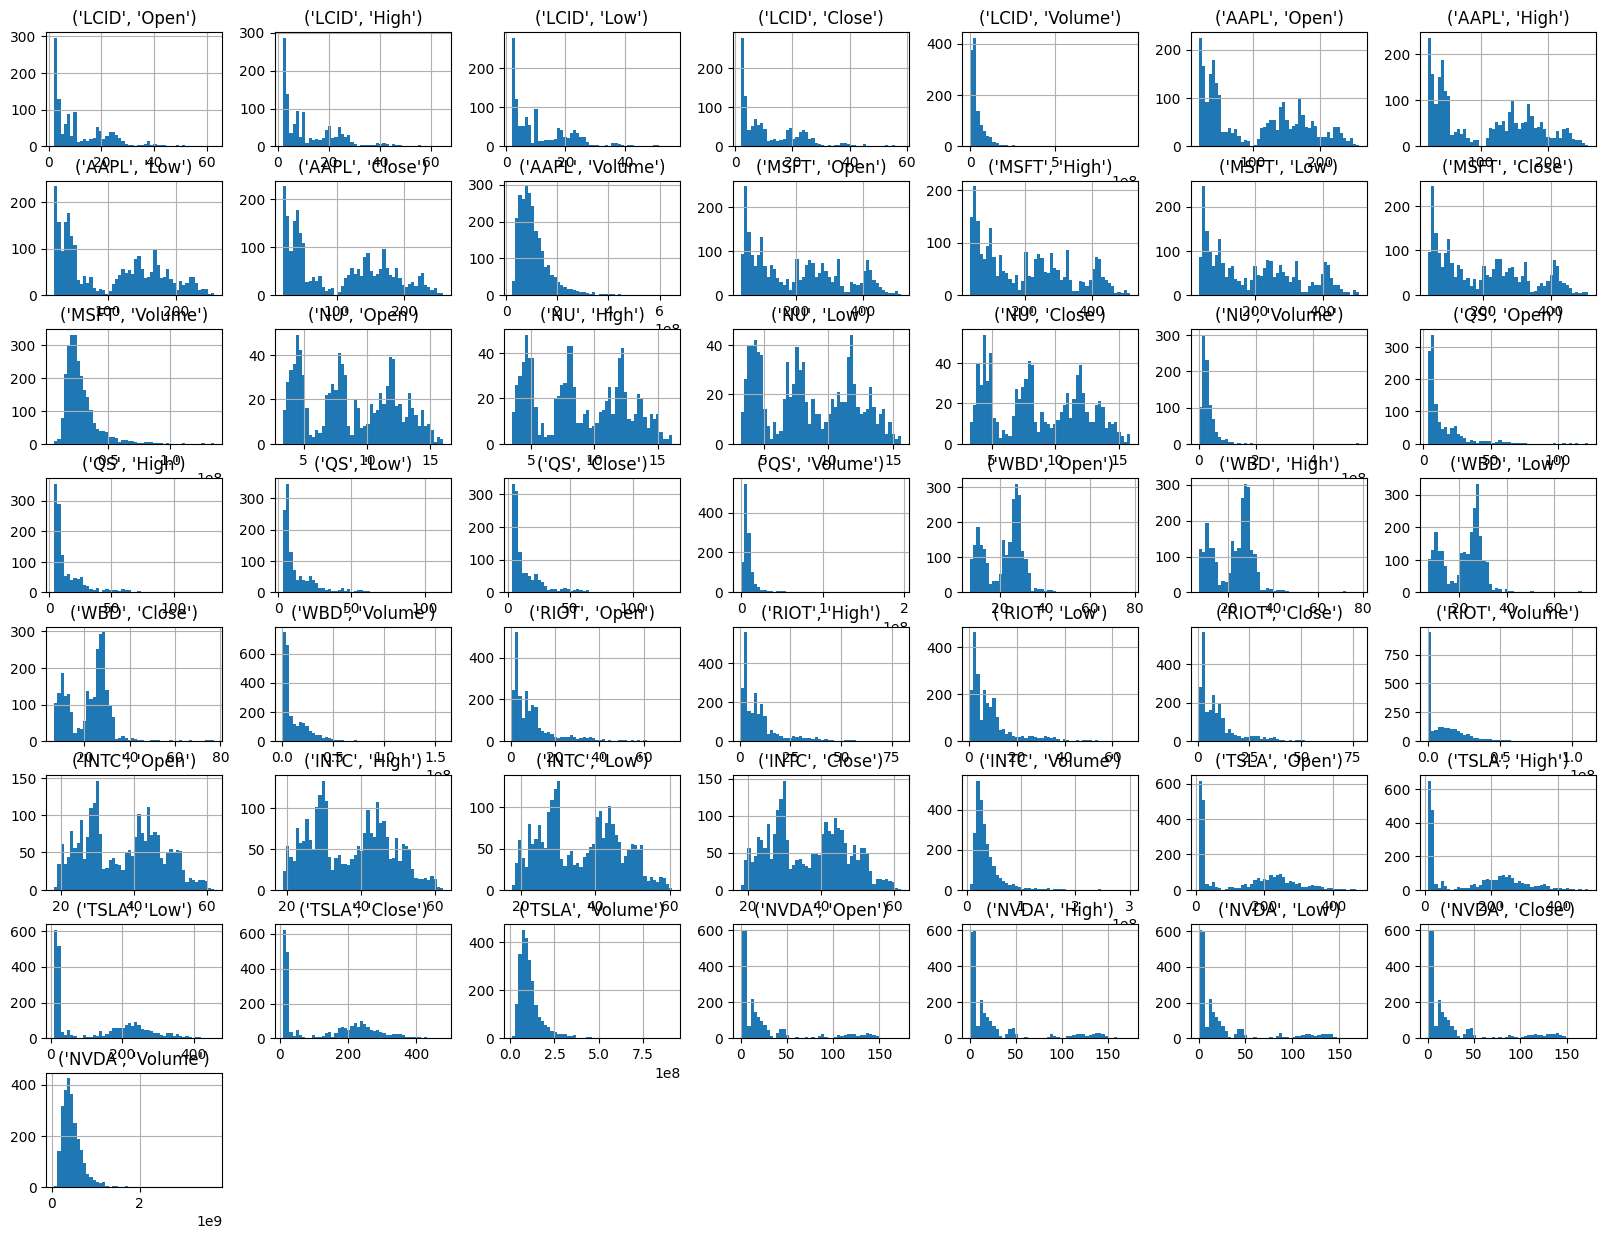

In [ ]:
all_ticker.hist(bins=50, figsize=(20,15))  # Plot histograms for each ticker   
plt.show()  # Show the histograms

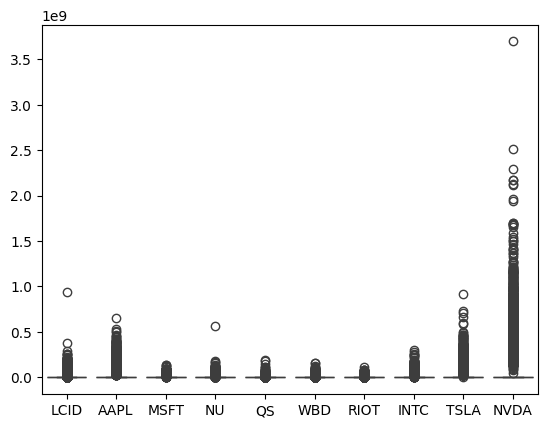

In [90]:
sns.boxplot(data=all_ticker)  # Create a boxplot for each ticker
plt.show()  # Show the boxplot

In [ ]:
def calc_returns(stock_df) -> pd.DataFrame:
    # Coleta todas as colunas Close de uma vez
    close_columns = [col for col in stock_df.columns if 'Close' in col]
    close_prices = stock_df[close_columns].copy()
    
    # Renomeia colunas para ficar mais limpo: ('AAPL', 'Close') -> 'AAPL'
    close_prices.columns = [col[0] for col in close_prices.columns]
    
    returns = close_prices.pct_change().dropna()  
    return returns

returns = calc_returns(all_ticker)

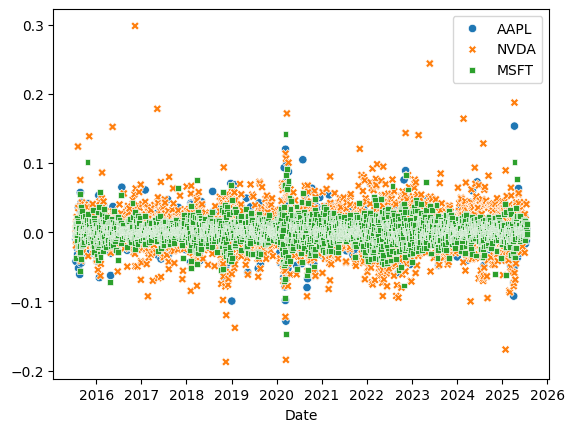

In [78]:
sns.scatterplot(data=returns)
plt.show()

---

### Calculate a Covariance Matrix

In [82]:
returns_cov = returns.cov()
returns_corr = returns.corr()
annual_returns_cov = returns_cov * 252   #252 dias úteis

print(f"Matriz de Covariância:\n {returns_cov}\n Covariância Anual:\n {annual_returns_cov}\n")
print(f"Matriz de Correlação:\n {returns_corr}")

Matriz de Covariância:
           AAPL      NVDA      MSFT
AAPL  0.000343  0.000317  0.000218
NVDA  0.000317  0.000996  0.000333
MSFT  0.000218  0.000333  0.000294
 Covariância Anual:
           AAPL      NVDA      MSFT
AAPL  0.086393  0.079812  0.055027
NVDA  0.079812  0.251106  0.084015
MSFT  0.055027  0.084015  0.073984

Matriz de Correlação:
           AAPL      NVDA      MSFT
AAPL  1.000000  0.541877  0.688282
NVDA  0.541877  1.000000  0.616399
MSFT  0.688282  0.616399  1.000000
